In [10]:
import numpy as np
import tensorflow as tf
import keras

In [352]:
from keras.models import Model
from keras.layers import Dense, Embedding, Dropout,Flatten,Concatenate, Masking
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [501]:
#input data
data_dir = "/home/niteesh/Documents/uni/HCI/Saarland/Npy_files/"
f="17.npy"
file = data_dir + f
data = np.load(file)
print(data.shape)

(503, 16, 2)


In [540]:
#Hyper-parameters, constants
max_length_saccades = 7
learning_rate=0.0001

In [541]:
#format data
Input = data[:,0:max_length_saccades,:]
y = data[:,-1,:]
print(Input.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(Input, y, test_size=0.33)


(503, 7, 2)
(503, 2)


In [542]:
optimizer = keras.optimizers.RMSprop(lr=learning_rate)
model = keras.models.Sequential()

layer1 = model.add(Masking(mask_value=np.nan, input_shape=(max_length_saccades, 2)))
layer2 = model.add(LSTM(128, return_sequences=True))

#model.add(LSTM(128,return_sequences=True,input_shape=(max_length_saccades, 2)))  
layer3 = model.add(LSTM(64,return_sequences=False))  
# returns a sequence of vectors of dimension 32

#model.add(Dropout(0.5))
#model.add(LSTM(8, return_sequences=True))  
# returns a sequence of vectors of dimension 32

#model.add(Flatten())
layer4 = model.add(Dropout(0.1))

#model.add(Dense(32, activation='relu'))

output_layer = model.add(Dense(2, activation='linear',name = 'output_layers'))

# try using different optimizers and different optimizer configs
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['accuracy'])
# Print summary
model.summary()
print("Inputs: {}".format(model.input_shape))
print("Outputs: {}".format(model.output_shape))
print("Actual input: {}".format(Input.shape))
print("Actual output: {}".format(y.shape))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_32 (Masking)         (None, 7, 2)              0         
_________________________________________________________________
lstm_229 (LSTM)              (None, 7, 128)            67072     
_________________________________________________________________
lstm_230 (LSTM)              (None, 64)                49408     
_________________________________________________________________
dropout_101 (Dropout)        (None, 64)                0         
_________________________________________________________________
output_layers (Dense)        (None, 2)                 130       
Total params: 116,610
Trainable params: 116,610
Non-trainable params: 0
_________________________________________________________________
Inputs: (None, 7, 2)
Outputs: (None, 2)
Actual input: (503, 7, 2)
Actual output: (503, 2)


In [543]:
#Fit the model to data
history = model.fit(x = Input, y= y, batch_size= 32, epochs = 10, verbose = 2, validation_split = 0.1, shuffle = True  )

Train on 452 samples, validate on 51 samples
Epoch 1/10
 - 12s - loss: nan - acc: 0.5619 - val_loss: nan - val_acc: 0.7451
Epoch 2/10
 - 0s - loss: nan - acc: 0.6991 - val_loss: nan - val_acc: 0.7451
Epoch 3/10
 - 0s - loss: nan - acc: 0.6991 - val_loss: nan - val_acc: 0.7451
Epoch 4/10
 - 0s - loss: nan - acc: 0.6991 - val_loss: nan - val_acc: 0.7451
Epoch 5/10
 - 0s - loss: nan - acc: 0.6991 - val_loss: nan - val_acc: 0.7451
Epoch 6/10
 - 0s - loss: nan - acc: 0.6991 - val_loss: nan - val_acc: 0.7451
Epoch 7/10
 - 0s - loss: nan - acc: 0.6991 - val_loss: nan - val_acc: 0.7451
Epoch 8/10
 - 0s - loss: nan - acc: 0.6991 - val_loss: nan - val_acc: 0.7451
Epoch 9/10
 - 0s - loss: nan - acc: 0.6991 - val_loss: nan - val_acc: 0.7451
Epoch 10/10
 - 0s - loss: nan - acc: 0.6991 - val_loss: nan - val_acc: 0.7451


In [527]:
#model.outputs[0]
#m.outputs = 
y_pred = model.predict(Input)
print(y_pred[0:10])
print(y[0:10])

[[3.53394   2.2949533]
 [3.608728  2.3708773]
 [3.647386  2.4286132]
 [3.7436602 2.596496 ]
 [3.7600462 2.5975847]
 [3.6083102 2.3672001]
 [3.5031743 2.2552056]
 [3.7276032 2.5636601]
 [0.9426783 0.6316561]
 [4.24292   2.69382  ]]
[[  213.546752    1053.5688    ]
 [   20.98096384  1066.34376   ]
 [  254.461824    1088.80128   ]
 [  249.230336    1201.69656   ]
 [  441.02784     1283.89248   ]
 [   46.387456    1351.27368   ]
 [  336.29056     1350.63504   ]
 [-1379.2768      -684.30672   ]
 [  910.53568     1021.3884    ]
 [ 1322.29632      820.76544   ]]


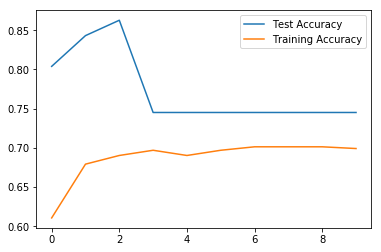

In [528]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_acc'], label="Test Accuracy")
plt.plot(history.history['acc'], label="Training Accuracy")
plt.legend()

([array([  1.,   0.,   0.,   1.,   0.,   0.,  44., 105., 131., 221.]),
  array([  1.,   0.,   1.,  34., 251., 216.,   0.,   0.,   0.,   0.])],
 array([0.6316561, 1.0661333, 1.5006104, 1.9350876, 2.3695648, 2.8040419,
        3.238519 , 3.672996 , 4.1074734, 4.54195  , 4.9764276],
       dtype=float32),
 <a list of 2 Lists of Patches objects>)

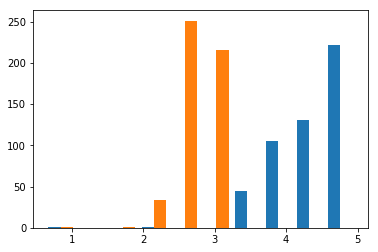

In [529]:
plt.hist(y_pred)

([array([  2.,   3.,   2.,  29., 337., 321., 240., 276.,   8.,   4.]),
  array([  0.,   0.,   3., 145., 485., 568.,  21.,   0.,   0.,   0.])],
 array([-2535.3984 , -1880.68864, -1225.97888,  -571.26912,    83.44064,
          738.1504 ,  1392.86016,  2047.56992,  2702.27968,  3356.98944,
         4011.6992 ]),
 <a list of 2 Lists of Patches objects>)

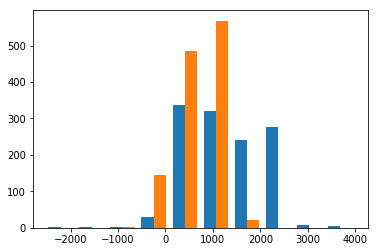

In [299]:
plt.hist(y)

In [544]:
layer_name = 'my_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('masking_32').output)
intermediate_output = intermediate_layer_model.predict(Input[107:108])
print(intermediate_output)
print(Input[107:108])

[[[950.71747 817.4354 ]
  [956.105   816.6341 ]
  [949.5693  813.35016]
  [937.4784  813.0262 ]
  [911.65314 805.8622 ]
  [871.5379  816.5585 ]
  [      nan       nan]]]
[[[950.71744 817.43544]
  [956.10496 816.63408]
  [949.56928 813.35016]
  [937.4784  813.02616]
  [911.65312 805.86216]
  [871.53792 816.55848]
  [      nan       nan]]]


In [520]:
model.get_layer('masking_30')

In [538]:
Input[0:1].shape


(1, 6, 2)